# IT Sektörü Analizi

**Proje Amacı ve Kullanılan Teknikler**

Bu proje, bir veri setinde çalışanların maaşlarını çeşitli kategorilere göre analiz ederek, iş pozisyonları ve deneyim seviyeleri arasındaki ilişkileri anlamayı amaçlamaktadır. Genel olarak, veri seti üzerinde yapılan analizler ve görselleştirmeler ile şu hedeflere ulaşılmak istenmiştir:

1. **Veri Analizi**: Çalışanların cinsiyet, pozisyon ve deneyim kategorilerine göre maaş dağılımlarını incelemek.
2. **Yüzdelik Dağılımlar**: Cinsiyetler ve pozisyon kategorileri arasındaki oranları hesaplayarak, veri setindeki genel dağılımı anlamak.
3. **Görselleştirme**: Farklı pozisyon ve deneyim kategorilerine göre maaş dağılımlarını çeşitli grafikler kullanarak görselleştirmek. Bu grafikler arasında boxplot, violin plot ve 3D yüzey grafikleri bulunmaktadır.

### Kullanılan Teknikler ve Teknolojiler:

- **Python**: Veri işleme ve analiz için ana programlama dili olarak kullanılmıştır.
- **Pandas**: Veri manipülasyonu ve analizi için kullanıldı. Özellikle veri setinin işlenmesi ve özetlenmesinde önemli bir rol oynadı.
- **NumPy**: Matematiksel hesaplamalar ve veri dönüşümleri için kullanıldı.
- **Seaborn ve Matplotlib**: Veri görselleştirme için kullanıldı. Seaborn ile detaylı ve estetik grafikler oluşturuldu; Matplotlib ise temel grafiklerin çiziminde yardımcı oldu.
- **Plotly**: Etkileşimli grafikler ve 3D yüzey grafiklerinin oluşturulmasında kullanıldı. Plotly, verilerin etkileşimli olarak incelenmesine olanak tanır.

Bu proje, çeşitli görselleştirme tekniklerini kullanarak veri setindeki karmaşık ilişkileri daha iyi anlamamızı sağlar ve bu bilgiler, iş kararları ve stratejik planlamalar için değerli bilgiler sunar.

In [6]:
import numpy as np
import pandas as pd

data=pd.read_csv("/kaggle/input/employee-data-simulation-it-industry/employee_data.csv")
real_data=data.copy()
real_data.head()

,ID,Gender,Experience (Years),Position,Salary
0,1,F,4,DevOps Engineer,109976
1,2,M,6,DevOps Engineer,120088
2,3,M,17,Web Developer,181301
3,4,M,7,Systems Administrator,77530
4,5,F,13,Systems Administrator,152397


Bu aşamada, projemize başlamak için gerekli olan veri setini yükledik ve üzerinde çalışacağımız veriyi inceledik. İlk olarak, veri analizi yapabilmek için numpy ve pandas kütüphanelerini projeye dahil ettik. Ardından, "employee_data.csv" adlı dosyadan veriyi yükleyip, bir kopyasını oluşturarak orijinal veriyi koruma altına aldık. Son olarak, veri setinin ilk satırlarına göz atarak, verinin doğru bir şekilde yüklendiğini kontrol ettik. Bu adımlarla, veriyi analiz etmeye hazır hale getirdik.

In [7]:
real_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  400 non-null    int64 
 1   Gender              400 non-null    object
 2   Experience (Years)  400 non-null    int64 
 3   Position            400 non-null    object
 4   Salary              400 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 15.8+ KB


Bu adımda, veri setinin genel yapısını ve özelliklerini anlamak amacıyla real_data.info() komutunu kullandık. Bu komut, veri setindeki sütunların isimlerini, veri tiplerini, eksik değerleri ve toplam satır sayısını özetleyen bir bilgi verir. Bu sayede, veri setinde hangi tür verilerle çalıştığımızı ve veri kalitesini değerlendirebiliriz.

In [8]:
real_data

,ID,Gender,Experience (Years),Position,Salary
0,1,F,4,DevOps Engineer,109976
1,2,M,6,DevOps Engineer,120088
2,3,M,17,Web Developer,181301
3,4,M,7,Systems Administrator,77530
4,5,F,13,Systems Administrator,152397
...,...,...,...,...,...
395,396,F,19,Cloud Solutions Architect,236045
396,397,F,20,Web Developer,182770
397,398,F,9,Network Administrator,85550
398,399,M,18,Database Administrator (DBA),129996


Bu aşamada, real_data komutunu kullanarak veri setine genel bir bakış attık. Bu işlem, veri setinin tamamını görmemizi ve üzerinde çalışacağımız tüm veriyi bir bütün olarak incelememizi sağlar. Bu adım, veriyi tanımak ve analizlere başlamadan önce veri setindeki yapı ve içeriği anlamak için önemlidir.

In [9]:
real_data["Position"].unique()

array(['DevOps Engineer', 'Web Developer', 'Systems Administrator',
       'IT Manager', 'Network Administrator',
       'Database Administrator (DBA)', 'IT Security Analyst',
       'Software Engineer', 'IT Support Specialist', 'Systems Analyst',
       'Cloud Solutions Architect'], dtype=object)

Bu adımda, veri setindeki tüm benzersiz pozisyonları görmek amacıyla real_data["Position"].unique() komutunu kullandık. Bu komut, çalışanların sahip olduğu farklı pozisyonları listeler ve hangi pozisyonların veri setinde yer aldığını anlamamızı sağlar. Bu bilgi, pozisyonlara göre kategoriler oluşturmak veya pozisyon bazlı analizler yapmak için temel teşkil eder.

In [10]:
def categorize_position(position):
    developer_positions = ['DevOps Engineer', 'Web Developer', 'Software Engineer']
    system_management_positions = ['Systems Administrator', 'Network Administrator', 'IT Support Specialist', 'Systems Analyst']
    data_management_positions = ['Database Administrator (DBA)', 'Cloud Solutions Architect']
    management_positions = ['IT Manager']
    security_positions = ['IT Security Analyst']
    
    if position in developer_positions:
        return 'Developer'
    elif position in system_management_positions:
        return 'System Management'
    elif position in data_management_positions:
        return 'Data Management'
    elif position in management_positions:
        return 'Governance'
    elif position in security_positions:
        return 'Security'
    else:
        return 'Other'

real_data['Position Category'] = real_data['Position'].apply(categorize_position)


Bu adımda, çalışanların pozisyonlarını daha geniş kategorilere ayırmak için bir fonksiyon oluşturduk. categorize_position fonksiyonu, her bir pozisyonu belirlediğimiz gruplara atar: Developer, System Management, Data Management, Governance, ve Security. Bu işlem, pozisyonları sınıflandırarak veri analizi sürecinde daha anlamlı ve odaklı çıkarımlar yapmamızı sağlayacak. Fonksiyonu, real_data['Position'] sütununa uygulayarak her pozisyon için uygun kategoriye atanmasını sağladık ve sonuçları Position Category sütununda depoladık.

In [11]:
real_data.head()

,ID,Gender,Experience (Years),Position,Salary,Position Category
0,1,F,4,DevOps Engineer,109976,Developer
1,2,M,6,DevOps Engineer,120088,Developer
2,3,M,17,Web Developer,181301,Developer
3,4,M,7,Systems Administrator,77530,System Management
4,5,F,13,Systems Administrator,152397,System Management


Bu aşamada, real_data.head() komutunu kullanarak veri setimizin ilk birkaç satırını inceledik. Bu komut, veri setindeki güncellemeleri ve eklenen Position Category sütununu gözlemlememizi sağlar. Böylece, pozisyonların doğru kategorilere ayrıldığını ve verinin doğru bir şekilde işlendiğini doğrulayabiliriz.

In [12]:
def categorize_experience(years):
    if years <= 3:
        return 'Entry Level'
    elif years <= 7:
        return 'Mid Level'
    elif years <= 15:
        return 'Experienced'
    else:
        return 'Senior'

real_data['Experience Category'] = real_data['Experience (Years)'].apply(categorize_experience)

Bu adımda, çalışanların deneyim yıllarını kategorilere ayırmak için bir fonksiyon tanımladık. categorize_experience fonksiyonu, deneyim yıllarına göre çalışanları dört seviyeye böler: Entry Level, Mid Level, Experienced, ve Senior. Bu kategoriler, deneyim seviyelerini daha net bir şekilde analiz etmemizi sağlar. Fonksiyonu real_data['Experience (Years)'] sütununa uygulayarak her çalışanın deneyim seviyesini belirledik ve bu bilgiyi Experience Category sütununda sakladık. Bu işlem, veri setindeki deneyim bilgilerini daha anlamlı ve düzenli bir biçimde sunmamızı sağlar.

In [13]:
real_data

,ID,Gender,Experience (Years),Position,Salary,Position Category,Experience Category
0,1,F,4,DevOps Engineer,109976,Developer,Mid Level
1,2,M,6,DevOps Engineer,120088,Developer,Mid Level
2,3,M,17,Web Developer,181301,Developer,Senior
3,4,M,7,Systems Administrator,77530,System Management,Mid Level
4,5,F,13,Systems Administrator,152397,System Management,Experienced
...,...,...,...,...,...,...,...
395,396,F,19,Cloud Solutions Architect,236045,Data Management,Senior
396,397,F,20,Web Developer,182770,Developer,Senior
397,398,F,9,Network Administrator,85550,System Management,Experienced
398,399,M,18,Database Administrator (DBA),129996,Data Management,Senior


In [14]:
real_data['Gender']=real_data['Gender'].replace({'F':'Female','M':'Male'})

Bu adımda, cinsiyet bilgilerini daha anlaşılır hale getirmek için real_data['Gender'] sütunundaki kısaltmaları ('F' ve 'M') tam metin biçimlerine dönüştürdük. 'F' değerlerini 'Female' ve 'M' değerlerini 'Male' olarak değiştirdik. Bu düzenleme, veri setinin daha anlaşılır ve okunabilir olmasını sağlar, böylece analizler sırasında cinsiyet bilgilerini daha net bir şekilde kullanabiliriz.

In [15]:
real_data

,ID,Gender,Experience (Years),Position,Salary,Position Category,Experience Category
0,1,Female,4,DevOps Engineer,109976,Developer,Mid Level
1,2,Male,6,DevOps Engineer,120088,Developer,Mid Level
2,3,Male,17,Web Developer,181301,Developer,Senior
3,4,Male,7,Systems Administrator,77530,System Management,Mid Level
4,5,Female,13,Systems Administrator,152397,System Management,Experienced
...,...,...,...,...,...,...,...
395,396,Female,19,Cloud Solutions Architect,236045,Data Management,Senior
396,397,Female,20,Web Developer,182770,Developer,Senior
397,398,Female,9,Network Administrator,85550,System Management,Experienced
398,399,Male,18,Database Administrator (DBA),129996,Data Management,Senior


## Analizler

In [16]:
gender_ratio = real_data["Gender"].value_counts(normalize=True) * 100
position_ratio = real_data["Position"].value_counts(normalize=True) * 100
position_category_ratio = real_data["Position Category"].value_counts(normalize=True) * 100
experience_category_ratio = real_data["Experience Category"].value_counts(normalize=True) * 100

position_ratio = real_data["Position"].value_counts(normalize=True) * 100


print(position_category_ratio,"\n\n",experience_category_ratio,"\n\n",position_ratio)

Position Category
System Management    34.25
Developer            29.00
Data Management      17.00
Governance           10.00
Security              9.75
Name: proportion, dtype: float64 

 Experience Category
Experienced    37.00
Senior         22.75
Entry Level    22.75
Mid Level      17.50
Name: proportion, dtype: float64 

 Position
Web Developer                   10.75
IT Manager                      10.00
IT Security Analyst              9.75
Systems Administrator            9.50
Database Administrator (DBA)     9.50
DevOps Engineer                  9.25
Systems Analyst                  9.25
Software Engineer                9.00
Network Administrator            7.75
IT Support Specialist            7.75
Cloud Solutions Architect        7.50
Name: proportion, dtype: float64


Bu aşamada, veri setimizdeki cinsiyet, pozisyon, pozisyon kategorileri ve deneyim kategorileri için yüzdelik oranları hesapladık. Hesaplamalar sonucunda, cinsiyetlerin, pozisyonların, pozisyon kategorilerinin ve deneyim kategorilerinin veri setindeki yüzdelik dağılımlarını belirledik. Bu bilgileri yazdırarak, özellikle pozisyon kategorileri ve deneyim kategorilerinin oranlarını örnek olarak inceledik ve bu sayede veri setindeki çeşitli kategorilerin genel dağılımını daha iyi anladık.

In [17]:
developer_data = real_data[real_data['Position Category'] == 'Developer']
system_management_data = real_data[real_data['Position Category'] == 'System Management']
data_management_data = real_data[real_data['Position Category'] == 'Data Management']
governance_data = real_data[real_data['Position Category'] == 'Governance']
security_data = real_data[real_data['Position Category'] == 'Security']

Bu aşamada, Position Category sütununa göre veri setini beş farklı pozisyon kategorisine ayırdık. Her kategori için ayrı veri kümeleri oluşturduk: 'Developer', 'System Management', 'Data Management', 'Governance', ve 'Security'. Bu filtreleme işlemi, her pozisyon kategorisinin detaylı analizini yapmamıza ve her bir kategori içindeki verileri daha iyi anlamamıza olanak sağlar.

In [18]:
system_management_data

,ID,Gender,Experience (Years),Position,Salary,Position Category,Experience Category
3,4,Male,7,Systems Administrator,77530,System Management,Mid Level
4,5,Female,13,Systems Administrator,152397,System Management,Experienced
6,7,Female,11,Systems Administrator,82328,System Management,Experienced
10,11,Female,19,Network Administrator,158856,System Management,Senior
20,21,Female,20,Network Administrator,139766,System Management,Senior
...,...,...,...,...,...,...,...
388,389,Female,4,Systems Administrator,102856,System Management,Mid Level
390,391,Male,11,IT Support Specialist,66076,System Management,Experienced
392,393,Female,1,Network Administrator,79333,System Management,Entry Level
394,395,Male,3,IT Support Specialist,54938,System Management,Entry Level


In [19]:
experience_category_ratio_developer = developer_data['Experience Category'].value_counts(normalize=True) * 100
experience_category_ratio_system_management = system_management_data['Experience Category'].value_counts(normalize=True) * 100
experience_category_ratio_data_management = data_management_data['Experience Category'].value_counts(normalize=True) * 100
experience_category_ratio_governance = governance_data['Experience Category'].value_counts(normalize=True) * 100
experience_category_ratio_security = security_data['Experience Category'].value_counts(normalize=True) * 100

print("Developer Experience Categories:\n", experience_category_ratio_developer)
print("\nSystem Management Experience Categories:\n", experience_category_ratio_system_management)
print("\nData Management Experience Categories:\n", experience_category_ratio_data_management)
print("\nGovernance Experience Categories:\n", experience_category_ratio_governance)
print("\nSecurity Experience Categories:\n", experience_category_ratio_security)


Developer Experience Categories:
 Experience Category
Experienced    35.344828
Senior         24.137931
Entry Level    21.551724
Mid Level      18.965517
Name: proportion, dtype: float64

System Management Experience Categories:
 Experience Category
Experienced    39.416058
Entry Level    22.627737
Senior         21.897810
Mid Level      16.058394
Name: proportion, dtype: float64

Data Management Experience Categories:
 Experience Category
Experienced    39.705882
Senior         22.058824
Entry Level    20.588235
Mid Level      17.647059
Name: proportion, dtype: float64

Governance Experience Categories:
 Experience Category
Experienced    35.0
Entry Level    27.5
Senior         22.5
Mid Level      15.0
Name: proportion, dtype: float64

Security Experience Categories:
 Experience Category
Experienced    30.769231
Entry Level    25.641026
Senior         23.076923
Mid Level      20.512821
Name: proportion, dtype: float64


Bu aşamada, her pozisyon kategorisindeki deneyim kategorilerinin yüzdelik oranlarını hesapladık. Öncelikle, pozisyon kategorilerine göre veri kümesini filtreledik ve ardından her kategori için Experience Category değerlerinin yüzdelik oranlarını belirledik. Bu hesaplamalar, her pozisyon kategorisindeki deneyim seviyelerinin nasıl dağıldığını anlamamıza yardımcı olur ve bu kategorilerdeki deneyim seviyelerinin oranlarını daha ayrıntılı bir şekilde analiz etmemizi sağlar. Bu veriler, her pozisyon türü için deneyim seviyelerinin dağılımını görselleştirmek ve karşılaştırmak için kullanılabilir.

In [20]:
salary_stats_by_experience_for_developer = developer_data.groupby('Experience Category')['Salary'].agg(['mean', 'min', 'max']).astype(int)
salary_stats_by_experience_for_system_management = system_management_data.groupby('Experience Category')['Salary'].agg(['mean', 'min', 'max']).astype(int)
salary_stats_by_experience_for_data_management = data_management_data.groupby('Experience Category')['Salary'].agg(['mean', 'min', 'max']).astype(int)
salary_stats_by_experience_for_governance = governance_data.groupby('Experience Category')['Salary'].agg(['mean', 'min', 'max']).astype(int)
salary_stats_by_experience_for_security = security_data.groupby('Experience Category')['Salary'].agg(['mean', 'min', 'max']).astype(int)

print("Salary Statistics by Experience Category for Developers:\n", salary_stats_by_experience_for_developer,"\n\n")
print("Salary Statistics by Experience Category for System Managements:\n", salary_stats_by_experience_for_system_management,"\n\n")
print("Salary Statistics by Experience Category for Data Managements:\n", salary_stats_by_experience_for_data_management,"\n\n")
print("Salary Statistics by Experience Category for Governances:\n", salary_stats_by_experience_for_governance,"\n\n")
print("Salary Statistics by Experience Category for Securities:\n", salary_stats_by_experience_for_security,"\n\n")

Salary Statistics by Experience Category for Developers:
                        mean    min     max
Experience Category                       
Entry Level           94316  57567  148634
Experienced          140729  81593  211620
Mid Level            108063  64220  157380
Senior               173809  93819  242819 


Salary Statistics by Experience Category for System Managements:
                        mean    min     max
Experience Category                       
Entry Level           78996  43643  126171
Experienced          119661  66076  186294
Mid Level             95145  62204  137535
Senior               145300  88993  206324 


Salary Statistics by Experience Category for Data Managements:
                        mean     min     max
Experience Category                        
Entry Level          111679   67396  159870
Experienced          155367   93165  252949
Mid Level            122717   94797  156504
Senior               176203  121293  242808 


Salary Statistics by Ex

Bu aşamada, her pozisyon kategorisi için deneyim seviyelerine göre maaşların ortalama, minimum ve maksimum değerlerini hesapladık. Her pozisyon kategorisindeki veri kümesini deneyim kategorisine göre grupladık ve her grubun maaş istatistiklerini belirledik. Bu analiz, pozisyon kategorileri arasındaki maaş farklılıklarını ve deneyim seviyelerinin maaş üzerindeki etkilerini daha iyi anlamamıza yardımcı olur. Ortalamaların yanı sıra, maaşların minimum ve maksimum değerlerini de inceleyerek, her pozisyon türündeki maaş aralıklarını değerlendirdik. Bu bilgiler, pozisyon kategorilerine göre maaş yapılarının detaylı bir analizini sağlar ve her kategori içindeki maaş varyasyonlarını ortaya koyar.

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt


Bu aşamada, veri görselleştirme için Seaborn ve Matplotlib kütüphanelerini import ettim. Seaborn, verileri estetik grafiklerle sunmama olanak tanırken, Matplotlib ise grafiklerin özelleştirilmesini sağlıyor. Bu adım, veri analizi ve görselleştirmede önemli bir ilerleme kaydetmemi sağladı.

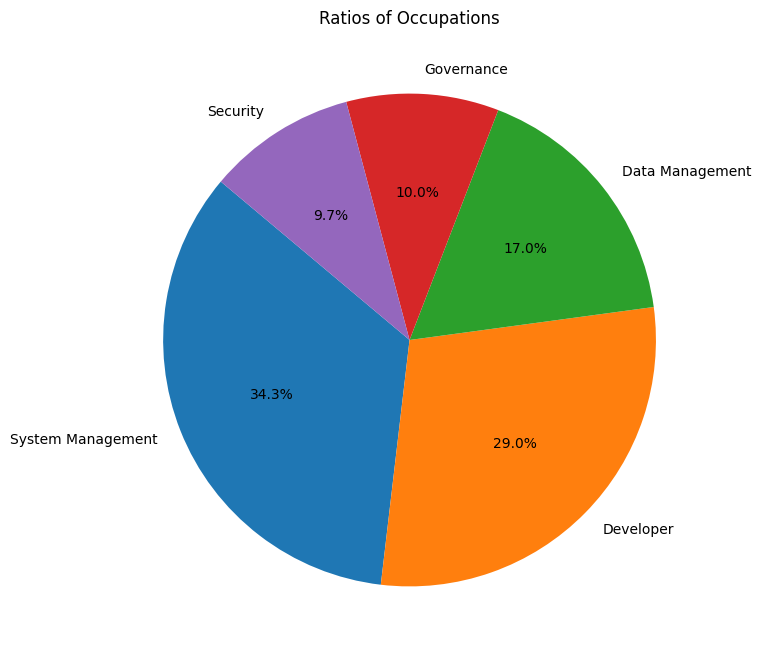

In [22]:
plt.figure(figsize=(8, 8))
plt.pie(position_category_ratio, labels= position_category_ratio.index, autopct='%1.1f%%', startangle=140)
plt.title("Ratios of Occupations")

plt.show()

Bu aşamada, pozisyon kategorilerinin oranlarını görselleştirmek için bir pasta grafiği oluşturdum. `plt.pie()` fonksiyonunu kullanarak, her pozisyon kategorisinin yüzdelik oranlarını gösterdim. Grafik, pozisyon kategorilerinin veri setindeki dağılımını net bir şekilde ortaya koyarak, bu kategorilerin oranlarını anlamayı kolaylaştırdı. Bu, veri analizindeki önemli görsel verileri özetlemenin etkili bir yoluydu.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

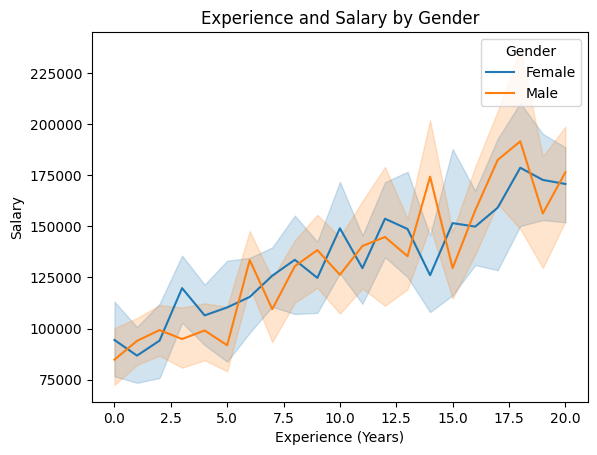

In [23]:
sns.lineplot(x='Experience (Years)', y='Salary', hue='Gender', data=real_data)
plt.title('Experience and Salary by Gender')
plt.show()

Bu aşamada, cinsiyete göre deneyim ve maaş arasındaki ilişkiyi göstermek için bir çizgi grafiği oluşturdum. `sns.lineplot()` fonksiyonunu kullanarak, farklı cinsiyetler için maaşın deneyime bağlı olarak nasıl değiştiğini görselleştirdim. Grafik, cinsiyetler arasındaki maaş farklarını ve deneyime bağlı maaş trendlerini analiz etmeme yardımcı oldu. Bu, veri setindeki cinsiyetler arasındaki maaş dağılımını daha iyi anlamamı sağladı.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

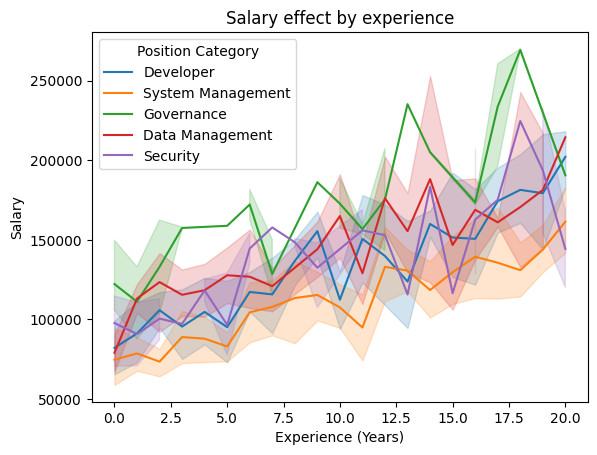

In [24]:
sns.lineplot(x='Experience (Years)', y='Salary',hue="Position Category", data=real_data)
plt.title('Salary effect by experience')
plt.show()

Bu aşamada, deneyime göre maaşın pozisyon kategorilerine etkisini göstermek için bir çizgi grafiği oluşturdum. `sns.lineplot()` fonksiyonunu kullanarak, farklı pozisyon kategorilerinin deneyime bağlı maaş trendlerini görselleştirdim. Grafik, her pozisyon kategorisinin maaş üzerindeki etkisini ve deneyime bağlı değişimini net bir şekilde ortaya koyarak, veri setindeki maaş dağılımını daha iyi anlamama yardımcı oldu.

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


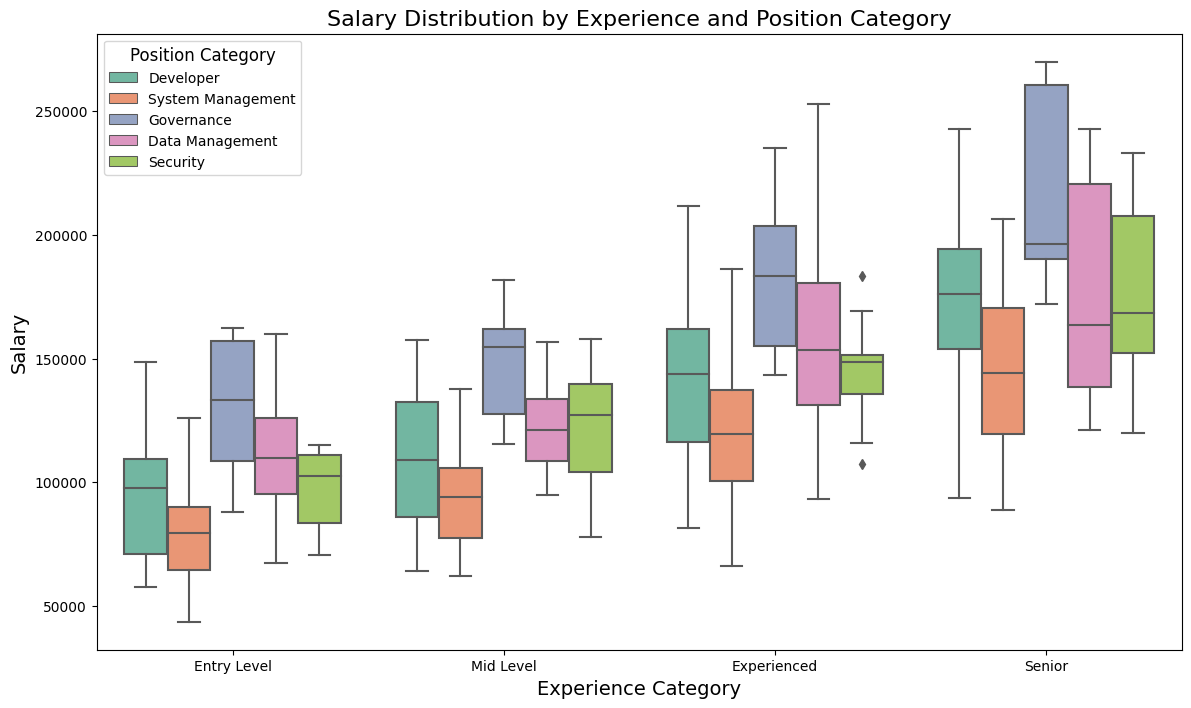

In [25]:

experience_order = ['Entry Level', 'Mid Level', 'Experienced', 'Senior']
real_data['Experience Category'] = pd.Categorical(real_data['Experience Category'], categories=experience_order, ordered=True)

plt.figure(figsize=(14, 8))

sns.boxplot(x='Experience Category', y='Salary', hue='Position Category', data=real_data, palette='Set2')

plt.title('Salary Distribution by Experience and Position Category', fontsize=16)
plt.xlabel('Experience Category', fontsize=14)
plt.ylabel('Salary', fontsize=14)

plt.legend(title='Position Category', title_fontsize=12, fontsize=10, loc='upper left')

plt.show()

Bu aşamada, deneyim kategorilerine ve pozisyon kategorilerine göre maaş dağılımını görselleştiren bir kutu grafiği oluşturdum. `sns.boxplot()` fonksiyonunu kullanarak, her deneyim kategorisi için maaş aralıklarını ve pozisyon kategorilerine göre dağılımı gösterdim. Grafik, farklı deneyim seviyelerindeki maaş aralıklarını ve pozisyon kategorilerine göre maaş varyasyonlarını net bir şekilde ortaya koyarak, veri setindeki maaş dağılımını daha iyi anlamama yardımcı oldu.

In [29]:
plt.figure(figsize=(14, 10))
sns.violinplot(x='Experience Category', y='Salary', hue='Position Category', data=real_data, split=True)

plt.title('Salary Distribution by Experience Category and Position Category')
plt.xlabel('Experience Category')
plt.ylabel('Salary')

plt.legend(title='Position Category', loc='upper left')

plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


ValueError: There must be exactly two hue levels to use `split`.'

<Figure size 1400x1000 with 0 Axes>

Bu aşamada, deneyim ve pozisyon kategorilerine göre maaş dağılımını görselleştiren bir keman grafiği oluşturdum. `sns.violinplot()` fonksiyonu kullanarak, her deneyim kategorisi için maaşın dağılımını ve pozisyon kategorilerine göre nasıl farklılık gösterdiğini görselleştirdim. Grafik, maaşların yoğunluk dağılımlarını ve pozisyon kategorilerine göre değişimini daha detaylı bir şekilde göstererek, veri setindeki maaş yapısını daha iyi anlamama olanak sağladı.

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


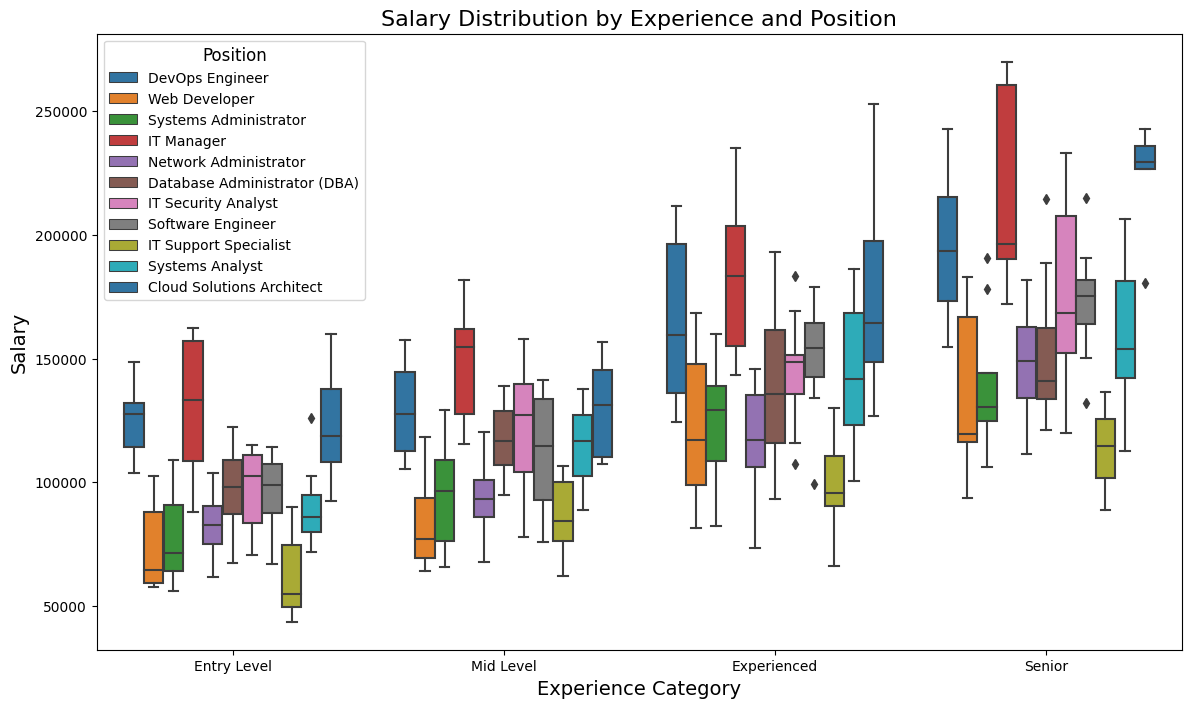

In [30]:
experience_order = ['Entry Level', 'Mid Level', 'Experienced', 'Senior']
real_data['Experience Category'] = pd.Categorical(real_data['Experience Category'], categories=experience_order, ordered=True)

plt.figure(figsize=(14, 8))

sns.boxplot(x='Experience Category', y='Salary', hue='Position', data=real_data, palette='tab10')

plt.title('Salary Distribution by Experience and Position', fontsize=16)
plt.xlabel('Experience Category', fontsize=14)
plt.ylabel('Salary', fontsize=14)

plt.legend(title='Position', title_fontsize=12, fontsize=10, loc='upper left')

plt.show()


Bu aşamada, `Experience Category` ve `Position` kategorilerine göre maaş dağılımını görselleştiren bir kutu grafiği oluşturdum. `sns.boxplot()` fonksiyonu kullanarak, her deneyim kategorisi için maaşların dağılımını ve pozisyona göre nasıl değiştiğini gösterdim. Grafik, farklı pozisyonlar arasındaki maaş farklılıklarını ve deneyim seviyelerine göre maaş aralıklarını belirgin bir şekilde ortaya koyarak, veri setindeki maaş yapısını daha kapsamlı bir şekilde analiz etmeme yardımcı oldu.

In [31]:
import plotly.graph_objects as go
from plotly.offline import plot

Bu aşamada, Plotly kütüphanesini veri görselleştirmelerinde kullanmak için içe aktardım. `import plotly.graph_objects as go` komutuyla Plotly'nin grafik oluşturma işlevlerine erişim sağladım. `from plotly.offline import plot` komutunu ise, görselleştirmeleri çevrimdışı olarak HTML dosyası olarak kaydetmek ve görüntülemek için kullanacağım. Plotly, interaktif grafikler oluşturmak için etkili bir araçtır ve bu sayede görselleştirmelerimde daha dinamik ve etkileşimli sunumlar hazırlayabileceğim.

In [32]:
etiketler = real_data['Position']

cizgi = go.Pie(labels = etiketler, 
               hoverinfo = 'label+value+percent', 
               textinfo = 'value+percent', 
               textfont = dict(size=8),
               rotation = 180,
               hole = 0.3,
               marker = dict(line=dict(color='#000000', width=1)))

veri_ = [cizgi]
yerlesim = dict(title = "Position Categories Distribution",
                legend=dict(orientation="h"))

fig = dict(data=veri_, layout=yerlesim)
plot(fig, filename = 'position_distribution.html')

'position_distribution.html'

Bu aşamada, Plotly kullanarak pozisyon kategorilerinin dağılımını gösteren bir dairesel grafik (pie chart) oluşturdum. `etiketler` değişkeni, veri setindeki pozisyonları içeren etiketler olarak kullanıldı. Grafik, her pozisyonun yüzdelik dağılımını ve değerini görselleştirir. `hole` parametresi ile grafiğin ortasında bir boşluk oluşturdum, böylece grafik halkasal bir görünüm kazandı. `marker` parametresi ile grafiğin kenar çizgilerini belirginleştirdim. Oluşturduğum bu grafik, pozisyon kategorilerinin genel dağılımını görsel olarak anlamaya yardımcı olacak. Grafiği `position_distribution.html` olarak kaydederek, tarayıcı üzerinden interaktif bir şekilde görüntülenmesini sağladım.

In [33]:
etiketler = real_data['Position Category']

cizgi = go.Pie(labels = etiketler, 
               hoverinfo = 'label+value+percent', 
               textinfo = 'value+percent', 
               textfont = dict(size=8),
               rotation = 180,
               hole = 0.3,
               marker = dict(line=dict(color='#000000', width=1)))

veri_ = [cizgi]
yerlesim = dict(title = "Position Categories Distribution",
                legend=dict(orientation="h"))

fig = dict(data=veri_, layout=yerlesim)
plot(fig, filename = 'position_category_distribution.html') 

'position_category_distribution.html'

Bu aşamada, `Position Category` verilerini kullanarak pozisyon kategorilerinin dağılımını görselleştiren bir dairesel grafik (pie chart) oluşturdum. Grafikte, her bir pozisyon kategorisinin oranını ve değerini gösteren etiketler kullanıldı. Grafik, verilerin daha iyi anlaşılabilmesi için ortasında boşluk olan bir halkasal (donut) görünümde tasarlandı. Ayrıca, grafiğin kenar çizgileri belirginleştirildi ve başlık ile birlikte bir efsane (legend) eklendi. Grafiği `position_category_distribution.html` olarak kaydederek, interaktif bir şekilde tarayıcıda görüntülenebilir hale getirdim. Bu grafik, pozisyon kategorilerinin veri setindeki dağılımını net bir şekilde gösterir.

/tmp/ipykernel_36/3933504524.py:1: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



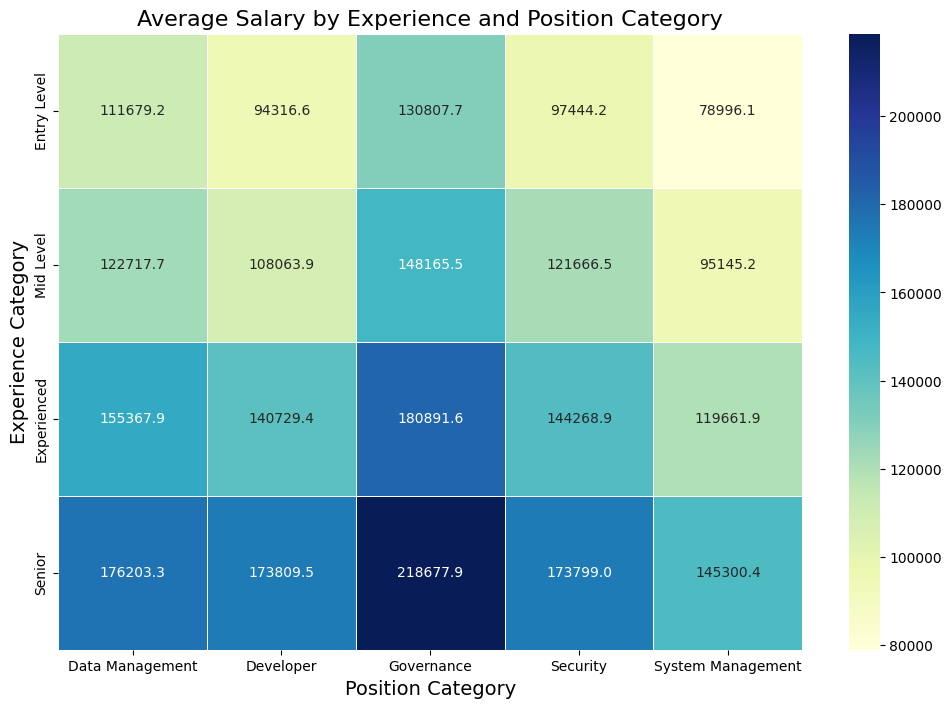

In [34]:
pivot_table = real_data.pivot_table(values='Salary', 
                                    index='Experience Category', 
                                    columns='Position Category', 
                                    aggfunc='mean')

plt.figure(figsize=(12, 8))

sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap='YlGnBu', linewidths=.5)

plt.title('Average Salary by Experience and Position Category', fontsize=16)
plt.xlabel('Position Category', fontsize=14)
plt.ylabel('Experience Category', fontsize=14)

plt.show()

Bu aşamada, deneyim kategorileri ve pozisyon kategorilerine göre ortalama maaşları görselleştiren bir ısı haritası (heatmap) oluşturduk. Bu grafik, her deneyim seviyesinde ve pozisyon kategorisinde maaşların ortalama değerlerini renkler ve sayılar aracılığıyla detaylı bir şekilde gösterir. Isı haritası, veri setindeki maaş dağılımını anlamayı kolaylaştırır ve hangi pozisyon ve deneyim kombinasyonlarının daha yüksek veya düşük maaşlar sunduğunu hızlıca görmemizi sağlar. Bu sayede, maaşların deneyim ve pozisyonlara göre nasıl farklılık gösterdiğini analiz ederek, daha kapsamlı bir veri değerlendirmesi yapmış olduk.

In [35]:
pivot_table = real_data.pivot_table(values='Salary', 
                                    index='Experience Category', 
                                    columns='Position Category', 
                                    aggfunc='mean')

fig = go.Figure(data=[go.Surface(
    z=pivot_table.values,
    x=pivot_table.columns,
    y=experience_order,
    colorscale='Viridis',
    colorbar=dict(title='Average Salary'),
    showscale=True
)])

fig.update_layout(
    title='3D Surface Plot of Average Salary by Experience Category and Position Category',
    scene=dict(
        xaxis_title='Position Category',
        yaxis_title='Experience Category',
        zaxis_title='Average Salary'
    ),
    autosize=False,
    width=800,
    height=800,
)

fig.show()

/tmp/ipykernel_36/220015369.py:1: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



Bu aşamada, deneyim kategorisi ve pozisyon kategorisine göre maaş dağılımını detaylı bir şekilde göstermek için bir 3D yüzey grafiği oluşturduk. Grafik, deneyim seviyeleri ve pozisyon kategorileri arasındaki maaş ilişkilerini üç boyutlu bir yüzey üzerinde görselleştirir. Bu tür bir grafik, değişkenler arasındaki ilişkileri ve maaş dağılımlarını daha derinlemesine analiz etmemize yardımcı olur, böylece veri setindeki karmaşık bağlantıları daha iyi anlayabiliriz.